In [1]:
from google.colab import files
uploaded = files.upload()

Saving phpgNaXZe.csv to phpgNaXZe.csv


#IMPORTING LIBRARIES

In [2]:
import seaborn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn import metrics

import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
dataset = pd.read_csv('phpgNaXZe.csv')

In [4]:
dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,Class
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,2
1,144,0.01,4.41,28.61,2,55,28.87,2.06,63,2
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,1
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,2
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,2


#HANDLING CATEGORICAL DATA

In [5]:
from sklearn.preprocessing import LabelEncoder
x = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values 
labelencoder_X = LabelEncoder()
x[:,0] = labelencoder_X.fit_transform(x[:,0])
x[:,1] = labelencoder_X.fit_transform(x[:,1])
print(x)

[[ 40.   188.     5.73 ...  25.3   97.2   52.  ]
 [ 30.     1.     4.41 ...  28.87   2.06  63.  ]
 [ 11.     8.     3.48 ...  29.14   3.81  46.  ]
 ...
 [  4.    94.     1.59 ...  20.09  26.64  55.  ]
 [ 11.   140.    11.61 ...  27.35  23.97  40.  ]
 [ 22.     0.     4.82 ...  14.7    0.    46.  ]]


#GRAPHS

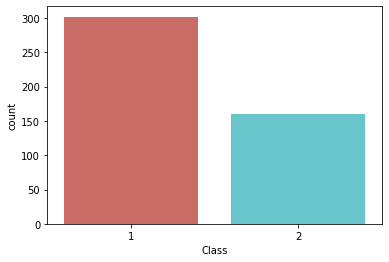

In [6]:
seaborn.countplot(x='Class',data=dataset, palette='hls')
plt.show()

#SPLITTING OF DATASET INTO TRAIN AND TEST SET

In [7]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(x, y, test_size = 0.25, random_state = 0)

#NORMALIZING DATA

In [8]:
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

#ALGORITHM

In [9]:
classifier = svm.SVC(kernel ='linear')

#FITTING OF TRAINING DATA

In [10]:
classifier.fit(X_Train,Y_Train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#PREDICTIONS FOR OUR PROBLEM STATEMENT WITH THE RELATED GRAPHS

In [11]:
Y_Pred = classifier.predict(X_Test)

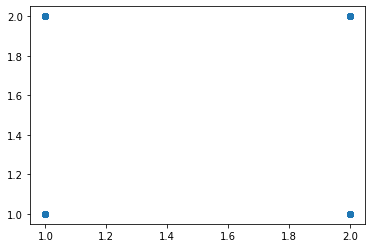

In [12]:
plt.scatter(Y_Test,Y_Pred)

#EVALUATION

In [13]:
print('Mean abolute error is:', metrics.mean_absolute_error(Y_Test,Y_Pred))
print('Mean squared error is:', metrics.mean_squared_error(Y_Test,Y_Pred))
print('Root mean squared error is:', np.sqrt(metrics.mean_squared_error(Y_Test,Y_Pred)))

Mean abolute error is: 0.25
Mean squared error is: 0.25
Root mean squared error is: 0.5


In [15]:
print(metrics.accuracy_score(Y_Test, Y_Pred))

0.75


#SAVING THE MODEL USING PICKLE LIBRARY

In [16]:
import pickle 

# Save the trained model as a pickle string. 
saved_model = pickle.dumps(classifier) 

# Load the pickled model 
model_from_pickle = pickle.loads(saved_model) 

# Use the loaded pickled model to make predictions 
model_from_pickle.predict(X_Test) 


array([1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1,
       1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2,
       1, 1, 1, 2, 2, 1])

#ACCURACY w.r.t TRAINED DATA

Confusion Matrix

In [17]:
Y_Train = Y_Train[0:116]
cm = confusion_matrix(Y_Train, Y_Pred)
print(cm)

[[55 22]
 [31  8]]


Precision, Recall, Support, Fscore

In [18]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(Y_Train, Y_Pred, average='macro')

(0.45310077519379843, 0.45970695970695974, 0.4533653418689429, None)

#ACCURACY w.r.t TEST DATA

Confusion Matrix

In [19]:
results =confusion_matrix(Y_Test, Y_Pred)
print(results)

[[67 10]
 [19 20]]


Precision, Recall, Support, Fscore

In [20]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(Y_Test, Y_Pred, average='macro')

(0.7228682170542635, 0.6914751914751914, 0.7008980172490442, None)